# Data Analysis: The Chinese Diaspora in Canada

>## Sadie Lee, WRDS 150

## 1. Overseas Chinese in Canada

### Loading Relevant Libraries

In [131]:
library(tidyverse)
library(tidymodels)
library(forcats)
library(RColorBrewer)
library(repr)
library(ggplot2)
library(knitr)
library(dplyr)
options(repr.matrix.max.rows = 6)

In [4]:
oc <- read_csv("data/oc_canada_data.csv")
oc

Rows: 6 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Year, Number_OC, Total_Population, Share_Total_Pop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Number_OC,Total_Population,Share_Total_Pop
<dbl>,<dbl>,<dbl>,<dbl>
1970,118815,21.37,0.55
1980,181755,24.42,0.74
1990,586645,27.54,2.13
2000,1094700,30.59,3.59
2010,1487580,34.15,4.36
2020,1715775,37.54,4.57


## 2. Economic Growth Statistics

In [49]:
oc_stats <- read_csv("data/oc_canada_econ_data3.csv")
oc_stats

Rows: 6 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): Year, RealGDP_Capita, Population_Share, Trade_Openness, Investment_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,RealGDP_Capita,Population_Share,Trade_Openness,Investment_Rate,China_Imports
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1970,5527.40,0.55,41.63,29.7,4.070e+08
1980,14979.75,0.74,53.50,28.6,8.120e+08
1990,28760.70,2.13,50.18,25.3,2.100e+09
2000,32546.20,3.59,82.77,22.6,5.300e+09
2010,63778.26,4.36,60.21,26.3,4.254e+10
2020,58006.82,4.57,60.78,24.4,6.882e+10


### Regressions - Real GDP Per Capita

In [95]:
cor(oc_stats$Population_Share, oc_stats$RealGDP_Capita)

[1] 0.9471535

`geom_smooth()` using formula 'y ~ x'



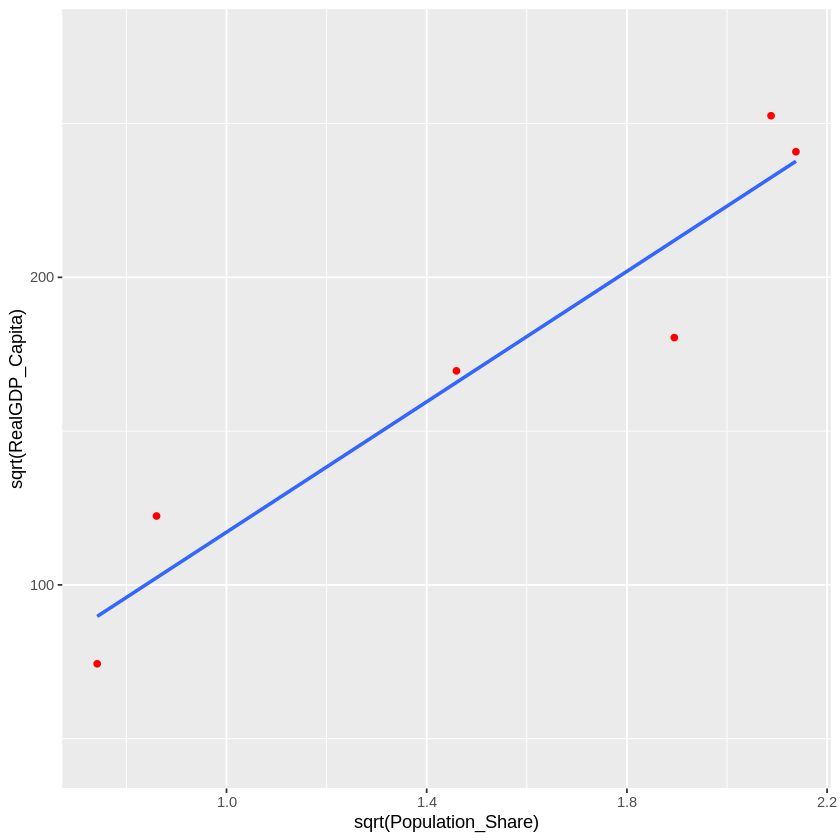

In [99]:
oc_stats |>
    ggplot(aes(x = sqrt(Population_Share), y = sqrt(RealGDP_Capita))) +
    geom_point(colour = "red") +
    geom_smooth(method = "lm", fill = NA)

In [102]:
lmodel <- lm(sqrt(Population_Share) ~ sqrt(RealGDP_Capita), data = oc_stats)
lmodel$coefficients

summary(lmodel)

(Intercept) sqrt(RealGDP_Capita) 
         0.039868201          0.008597674


Call:
lm(formula = sqrt(Population_Share) ~ sqrt(RealGDP_Capita), data = oc_stats)

Residuals:
       1        2        3        4        5        6 
 0.06254 -0.23192 -0.03849  0.30379 -0.12309  0.02717 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.039868   0.246904   0.161  0.87955   
sqrt(RealGDP_Capita) 0.008598   0.001340   6.415  0.00304 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2045 on 4 degrees of freedom
Multiple R-squared:  0.9114,	Adjusted R-squared:  0.8892 
F-statistic: 41.15 on 1 and 4 DF,  p-value: 0.003035


### Regressions - Trade Openness

In [103]:
cor(oc_stats$Population_Share, oc_stats$Trade_Openness)

[1] 0.6394077

`geom_smooth()` using formula 'y ~ x'



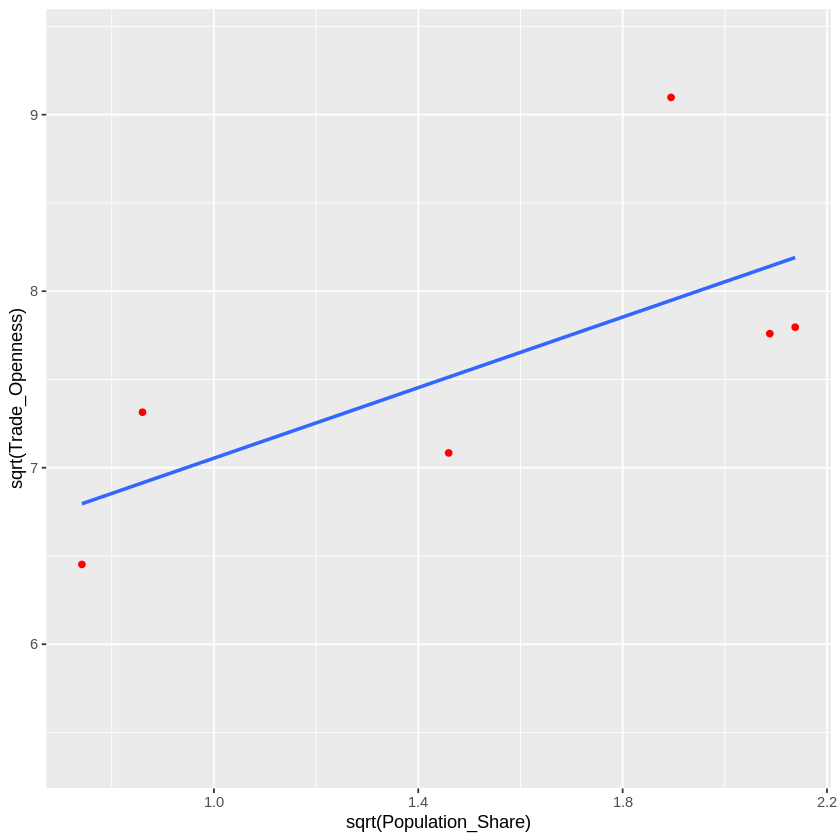

In [104]:
oc_stats |>
    ggplot(aes(x = sqrt(Population_Share), y = sqrt(Trade_Openness))) +
    geom_point(colour = "red") +
    geom_smooth(method = "lm", fill = NA)

In [105]:
lmodel <- lm(sqrt(Population_Share) ~ sqrt(Trade_Openness), data = oc_stats)
lmodel$coefficients

summary(lmodel)

(Intercept) sqrt(Trade_Openness) 
          -2.0735863            0.4751997


Call:
lm(formula = sqrt(Population_Share) ~ sqrt(Trade_Openness), data = oc_stats)

Residuals:
      1       2       3       4       5       6 
-0.2508 -0.5420  0.1668 -0.3550  0.4743  0.5066 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)           -2.0736     1.9062  -1.088    0.338
sqrt(Trade_Openness)   0.4752     0.2499   1.902    0.130

Residual standard error: 0.498 on 4 degrees of freedom
Multiple R-squared:  0.4748,	Adjusted R-squared:  0.3435 
F-statistic: 3.616 on 1 and 4 DF,  p-value: 0.13


### Regressions - Investment Rate

In [106]:
cor(oc_stats$Population_Share, oc_stats$Investment_Rate)

[1] -0.7703841

`geom_smooth()` using formula 'y ~ x'



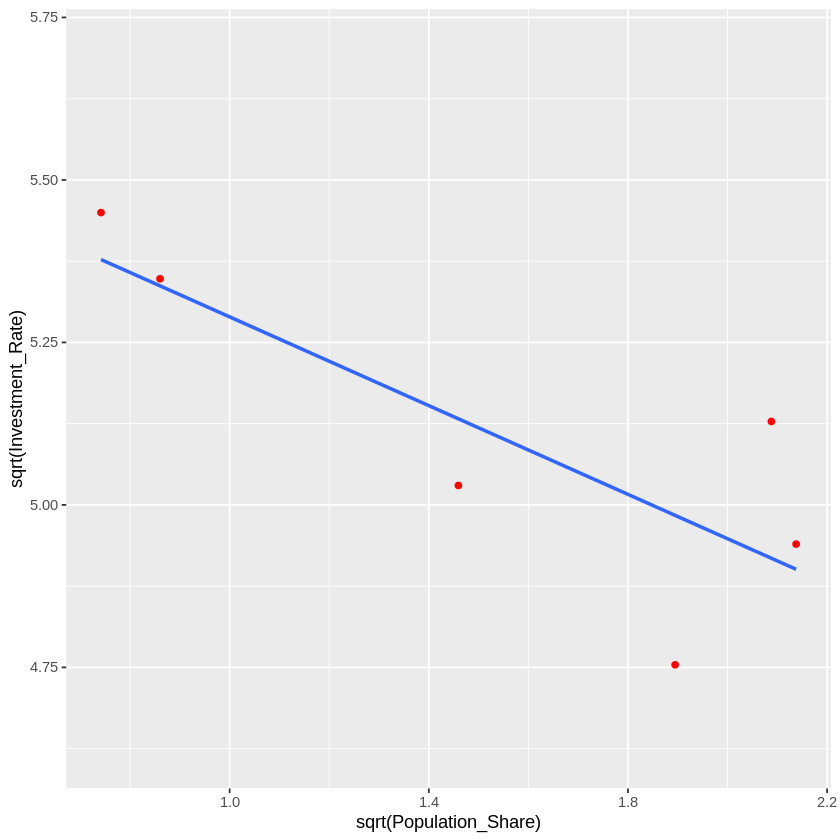

In [107]:
oc_stats |>
    ggplot(aes(x = sqrt(Population_Share), y = sqrt(Investment_Rate))) +
    geom_point(colour = "red") +
    geom_smooth(method = "lm", fill = NA)

In [108]:
lmodel <- lm(sqrt(Population_Share) ~ sqrt(Investment_Rate), data = oc_stats)
lmodel$coefficients

summary(lmodel)

(Intercept) sqrt(Investment_Rate) 
            11.373833             -1.926985


Call:
lm(formula = sqrt(Population_Share) ~ sqrt(Investment_Rate), 
    data = oc_stats)

Residuals:
      1       2       3       4       5       6 
-0.1306 -0.2083 -0.2218 -0.3183  0.5965  0.2825 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)            11.3738     3.5545   3.200   0.0329 *
sqrt(Investment_Rate)  -1.9270     0.6951  -2.772   0.0502 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4021 on 4 degrees of freedom
Multiple R-squared:  0.6577,	Adjusted R-squared:  0.5721 
F-statistic: 7.686 on 1 and 4 DF,  p-value: 0.05021


### Regressions - Imports of Chinese Origin

In [110]:
cor(oc_stats$Population_Share, oc_stats$China_Imports)

[1] 0.7993181

`geom_smooth()` using formula 'y ~ x'



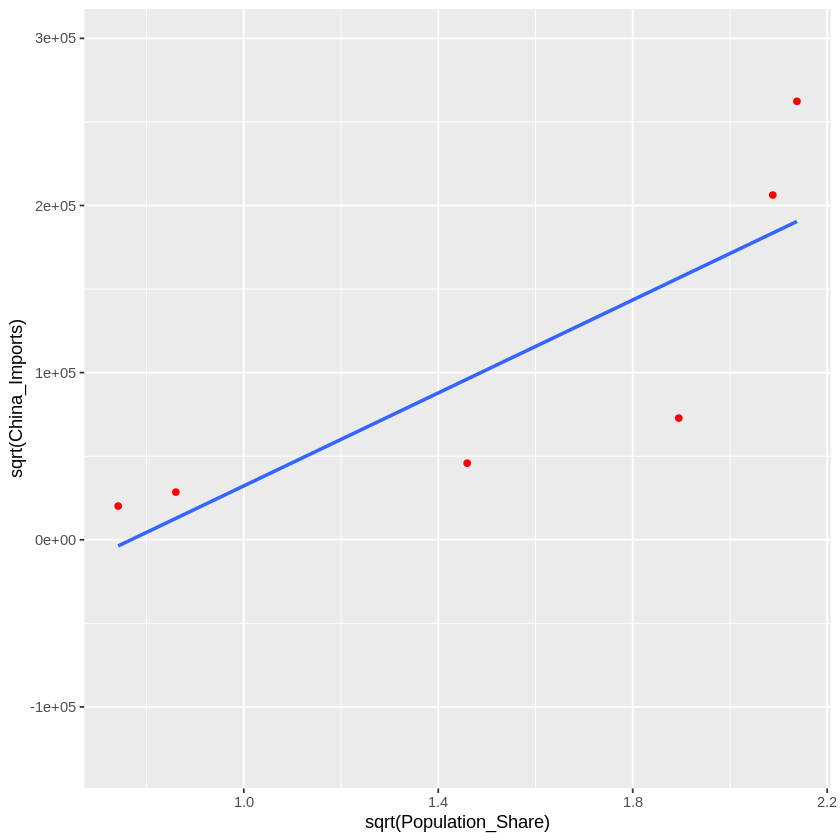

In [111]:
oc_stats |>
    ggplot(aes(x = sqrt(Population_Share), y = sqrt(China_Imports))) +
    geom_point(colour = "red") +
    geom_smooth(method = "lm", fill = NA)

In [112]:
lmodel <- lm(sqrt(Population_Share) ~ sqrt(China_Imports), data = oc_stats)
lmodel$coefficients

summary(lmodel)

(Intercept) sqrt(China_Imports) 
       1.000942e+00        4.994930e-06


Call:
lm(formula = sqrt(Population_Share) ~ sqrt(China_Imports), data = oc_stats)

Residuals:
      1       2       3       4       5       6 
-0.3601 -0.2830  0.2296  0.5302  0.0569 -0.1735 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)         1.001e+00  2.342e-01   4.274   0.0129 *
sqrt(China_Imports) 4.995e-06  1.656e-06   3.016   0.0393 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3798 on 4 degrees of freedom
Multiple R-squared:  0.6946,	Adjusted R-squared:  0.6182 
F-statistic: 9.097 on 1 and 4 DF,  p-value: 0.03931


### Cross-Section Regressions - GDP Growth (1970-2020)

In [123]:
gdp_cross <- oc_stats |>
             filter(Year == 1970) |>
             select(Year, RealGDP_Capita)
gdp_cross2 <- oc_stats |>
             filter(Year == 2020) |>
             select(Year, RealGDP_Capita)
full_join(gdp_cross, gdp_cross2)

Joining, by = c("Year", "RealGDP_Capita")


Year,RealGDP_Capita
<dbl>,<dbl>
1970,5527.40
2020,58006.82


In [124]:
cross_lm_model <- lm(sqrt(Year) ~ sqrt(RealGDP_Capita), data = oc_stats)
cross_lm_model$coefficients

summary(cross_lm_model)

(Intercept) sqrt(RealGDP_Capita) 
         44.15085649           0.00296594


Call:
lm(formula = sqrt(Year) ~ sqrt(RealGDP_Capita), data = oc_stats)

Residuals:
       1        2        3        4        5        6 
 0.01332 -0.01667 -0.04443  0.03543 -0.06686  0.07922 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.415e+01  7.250e-02 608.959 4.36e-11 ***
sqrt(RealGDP_Capita) 2.966e-03  3.936e-04   7.536  0.00166 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06006 on 4 degrees of freedom
Multiple R-squared:  0.9342,	Adjusted R-squared:  0.9177 
F-statistic: 56.79 on 1 and 4 DF,  p-value: 0.001661


In [54]:
gdp_1970 <- oc_stats |>
            filter(Year == 1970) |>
            select(RealGDP_Capita)
gdp_2020 <- oc_stats |>
            filter(Year == 2020) |>
            select(RealGDP_Capita)
gdp_growth <- ((gdp_1970 + gdp_2020)/2)/100
gdp_growth

RealGDP_Capita
<dbl>
317.6711


### Cross-Section Regressions - Trade Openness (1970-2020)

In [125]:
to_cross <- oc_stats |>
             filter(Year == 1970) |>
             select(Year, Trade_Openness)
to_cross2 <- oc_stats |>
             filter(Year == 2020) |>
             select(Year, Trade_Openness)
full_join(to_cross, to_cross2)

Joining, by = c("Year", "Trade_Openness")


Year,Trade_Openness
<dbl>,<dbl>
1970,41.63
2020,60.78


In [126]:
cross_lm_model <- lm(sqrt(Year) ~ sqrt(Trade_Openness), data = oc_stats)
cross_lm_model$coefficients

summary(cross_lm_model)

(Intercept) sqrt(Trade_Openness) 
          43.5871901            0.1421189


Call:
lm(formula = sqrt(Year) ~ sqrt(Trade_Openness), data = oc_stats)

Residuals:
       1        2        3        4        5        6 
-0.11948 -0.12951  0.01549 -0.15880  0.14306  0.24924 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          43.58719    0.71372  61.071 4.31e-07 ***
sqrt(Trade_Openness)  0.14212    0.09357   1.519    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1865 on 4 degrees of freedom
Multiple R-squared:  0.3658,	Adjusted R-squared:  0.2072 
F-statistic: 2.307 on 1 and 4 DF,  p-value: 0.2034


In [55]:
to_1970 <- oc_stats |>
           filter(Year == 1970) |>
           select(Trade_Openness)
to_2020 <- oc_stats |>
           filter(Year == 2020) |>
           select(Trade_Openness)
trade_openness_growth <- ((to_1970 + to_2020)/2)/100
trade_openness_growth

Trade_Openness
<dbl>
0.51205


### Cross-Section Regressions - Investment Rate (1970-2020)

In [127]:
invest_cross <- oc_stats |>
             filter(Year == 1970) |>
             select(Year, Investment_Rate)
invest_cross2 <- oc_stats |>
             filter(Year == 2020) |>
             select(Year, Investment_Rate)
full_join(invest_cross, invest_cross2)

Joining, by = c("Year", "Investment_Rate")


Year,Investment_Rate
<dbl>,<dbl>
1970,29.7
2020,24.4


In [128]:
cross_lm_model <- lm(sqrt(Year) ~ sqrt(Investment_Rate), data = oc_stats)
cross_lm_model$coefficients

summary(cross_lm_model)

(Intercept) sqrt(Investment_Rate) 
            47.646844             -0.583728


Call:
lm(formula = sqrt(Year) ~ sqrt(Investment_Rate), data = oc_stats)

Residuals:
       1        2        3        4        5        6 
-0.08098 -0.02794 -0.10133 -0.15047  0.17974  0.18097 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            47.6468     1.4345  33.216  4.9e-06 ***
sqrt(Investment_Rate)  -0.5837     0.2805  -2.081    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1623 on 4 degrees of freedom
Multiple R-squared:  0.5198,	Adjusted R-squared:  0.3998 
F-statistic:  4.33 on 1 and 4 DF,  p-value: 0.1059


In [56]:
ir_1970 <- oc_stats |>
           filter(Year == 1970) |>
           select(Investment_Rate)
ir_2020 <- oc_stats |>
           filter(Year == 2020) |>
           select(Investment_Rate)
investment_rate_growth <- ((ir_1970 + ir_2020)/2)/100
investment_rate_growth

Investment_Rate
<dbl>
0.2705


### Cross-Section Regressions - Imports from China (1970-2020)

In [129]:
cimports_cross <- oc_stats |>
             filter(Year == 1970) |>
             select(Year, China_Imports)
cimports_cross2 <- oc_stats |>
             filter(Year == 2020) |>
             select(Year, China_Imports)
full_join(cimports_cross, cimports_cross2)

Joining, by = c("Year", "China_Imports")


Year,China_Imports
<dbl>,<dbl>
1970,4.070e+08
2020,6.882e+10


In [130]:
cross_lm_model <- lm(sqrt(Year) ~ sqrt(China_Imports), data = oc_stats)
cross_lm_model$coefficients

summary(cross_lm_model)

(Intercept) sqrt(China_Imports) 
       4.446537e+01        1.883807e-06


Call:
lm(formula = sqrt(Year) ~ sqrt(China_Imports), data = oc_stats)

Residuals:
       1        2        3        4        5        6 
-0.11869 -0.02186  0.05772  0.11885 -0.02088 -0.01515 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.447e+01  5.574e-02 797.675 1.48e-11 ***
sqrt(China_Imports) 1.884e-06  3.942e-07   4.779  0.00878 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0904 on 4 degrees of freedom
Multiple R-squared:  0.851,	Adjusted R-squared:  0.8137 
F-statistic: 22.84 on 1 and 4 DF,  p-value: 0.008783


In [57]:
imports_1970 <- oc_stats |>
                filter(Year == 1970) |>
                select(China_Imports)
imports_2020 <- oc_stats |>
                filter(Year == 2020) |>
                select(China_Imports)
china_imports_growth <- ((imports_1970 + imports_2020)/2)/100
china_imports_growth

China_Imports
<dbl>
346135000
